In [1]:
# Author: Zhuoer Hu, Jiayuan Jiang, Zezheng Fu
import numpy as np
import pandas as pd
import yfinance as yf

In [8]:
etf_ticker = 'SPY'
spy_yf = yf.download(etf_ticker,start="2019-1-1",end="2023-2-10")['Adj Close'] # type is series
# First date is 2019-01-02, last date is 2023-02-09
spy_yf = pd.DataFrame(spy_yf)

# Same as get an series then transfer info dataframe
# spy_yf = yf.download(etf_ticker,start="2019-1-1",end="2023-2-10")
# spy_yf=spy_yf.drop(columns=['Open','High','Low','Close','Volume'])


[*********************100%***********************]  1 of 1 completed


In [20]:
spy_yf['log_ret'] = np.log(spy_yf['Adj Close'] /spy_yf['Adj Close'] .shift(1))
spy_yf['cum_ret'] = spy_yf['log_ret'].cumsum().apply(np.exp)
spy_yf['cum_ret'][0] = 1
total_Invest = 100
spy_yf['SPY_ret'] = total_Invest*spy_yf['cum_ret']
spy_yf['test']=spy_yf['Adj Close']*100/spy_yf['Adj Close'][0]

In [34]:
ticker_list = ['META','AMZN','AAPL','NFLX','GOOG','MSFT']
faang_yf = yf.download(ticker_list,start="2019-1-1",end="2023-2-10")['Adj Close']
individual_Invest = total_Invest/6
# Sum Method 1
# faang_yf['FAANGM_ret'] = \
#     faang_yf['META']*individual_Invest/faang_yf['META'][0]+\
#     faang_yf['AAPL']*individual_Invest/faang_yf['AAPL'][0]+\
#     faang_yf['AMZN']*individual_Invest/faang_yf['AMZN'][0]+\
#     faang_yf['NFLX']*individual_Invest/faang_yf['NFLX'][0]+\
#     faang_yf['GOOG']*individual_Invest/faang_yf['GOOG'][0]+\
#     faang_yf['MSFT']*individual_Invest/faang_yf['MSFT'][0]
# Sum Method 2
faang_yf['FAANGM_ret']=0
for i in ticker_list:
    faang_yf['FAANGM_ret'] = faang_yf['FAANGM_ret']+faang_yf[i]*individual_Invest/faang_yf[i][0]


[*********************100%***********************]  6 of 6 completed


<AxesSubplot:xlabel='Date'>

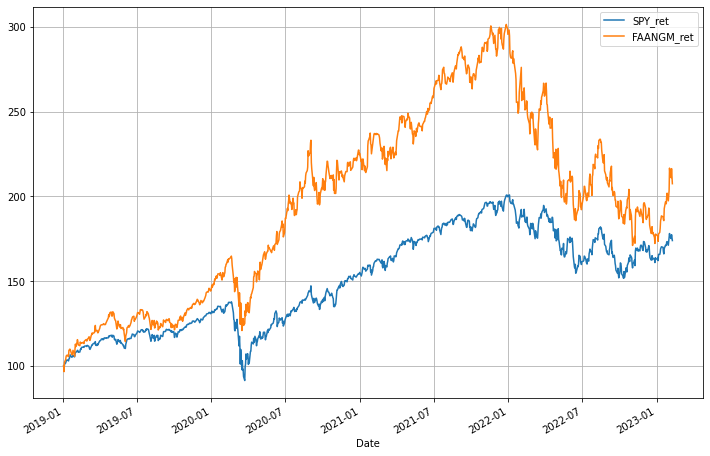

In [48]:
results = pd.merge(spy_yf['SPY_ret'],faang_yf['FAANGM_ret'],left_index=True,right_index=True)
results.plot(figsize=(12,8),grid=True)